In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [7]:
# read the data
df = pd.read_csv(r"C:\Users\ruvey\Desktop\Portfolyo\Data\movies.csv")

In [9]:
# LET's look at the data (first 5 rows)
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
df['released'] = df['released'].str.split('(').str[0].str.strip()
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

              released  score      votes         director  \
0        June 13, 1980    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980    5.8    65000.0   Randal Kleiser   
2        June 20, 1980    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980    7.7   221000.0     Jim Abrahams   
4        July 25, 1980    7.3   108000.0     Harold Ramis   
...                ...    ...        ...              ...   
7663  October 23, 2020    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020    4.7       36.0     Dusty Dukatz   
7665    April 27, 2020    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020    NaN        NaN    James Randall   
7667   August 19, 2020    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [13]:
df['released'] = pd.to_datetime(df['released'], errors = 'coerce')

In [15]:
print(df['released'])

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7663   2020-10-23
7664   2020-02-07
7665   2020-04-27
7666   2020-10-01
7667   2020-08-19
Name: released, Length: 7668, dtype: datetime64[ns]


In [17]:
# LET's see if there is missing value
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}'.format(col,pct_missing))

name - 0.00
rating - 0.01
genre - 0.00
year - 0.00
released - 0.01
score - 0.00
votes - 0.00
director - 0.00
writer - 0.00
star - 0.00
country - 0.00
budget - 0.28
gross - 0.02
company - 0.00
runtime - 0.00


In [19]:
print(type(df.columns))

<class 'pandas.core.indexes.base.Index'>


In [21]:
# Data type of columns
df.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

In [23]:
# Budget column data type changing
df['budget'] = df['budget'].fillna(0).astype('int64')

In [ ]:
# Gross column data type changing
df['gross'] = df['gross'].fillna(0).astype('int64')

In [25]:
# Create new corrected year column 
df['YearCorrect'] = df['released'].astype('str').str[:4]

In [ ]:
df

In [27]:
df=df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [29]:
pd.set_option('display.max_rows',None)

In [31]:
# Remove the duplicates
df['company'] = df['company'].drop_duplicates()

In [33]:
df

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [ ]:
# Budget high correlation
# Company high correlation 

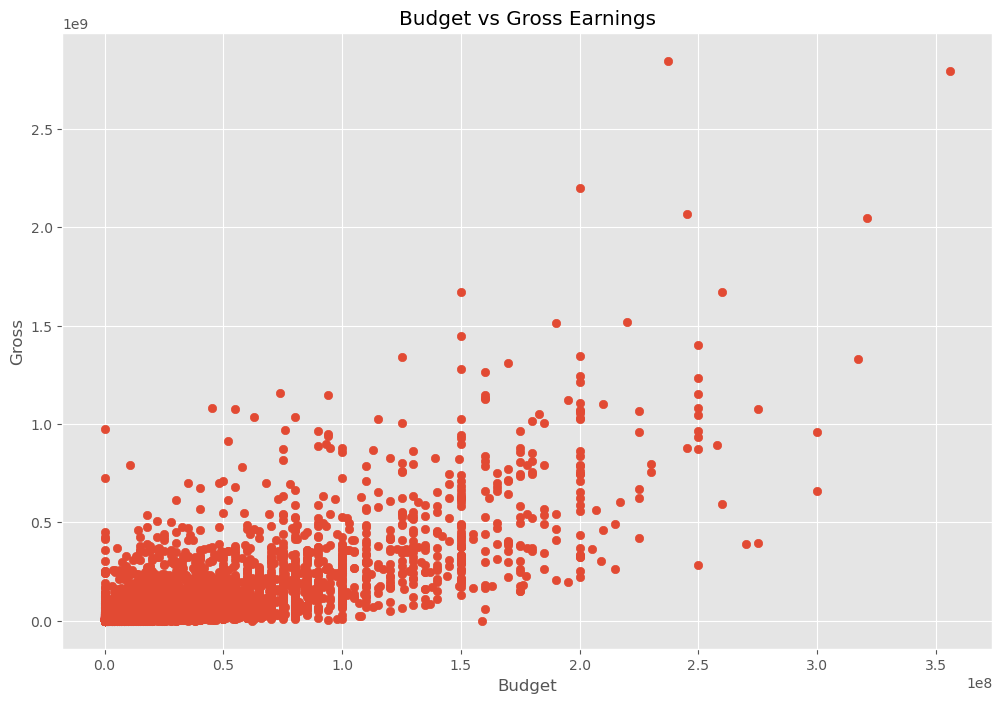

In [35]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [37]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

       released  score      votes       director              writer  \
5445 2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445 2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045 1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663 2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244 2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget         gross  \
5445    Sam Worthington  United States  237000000  2.847246e+09   
7445  Robert Downey Jr.  United States  356000000  2.797501e+09   
3045  Leonardo DiCaprio  United States  200000000  2.201647e+09   
6663       Daisy Ridley  United States  245000000  2.069522e+09   
7244  Robert Downey Jr.  United States  321000000  2.048360e+09   

                    company  runtime YearCorrect  
5445  Twentieth Century Fox    162.0        2009  
7445         Marvel Studios    181.0        2019  
3045                    NaN    194.0        1997  
6663              Lucasfilm    138.0        2015  
7244                    NaN    149.0        2018

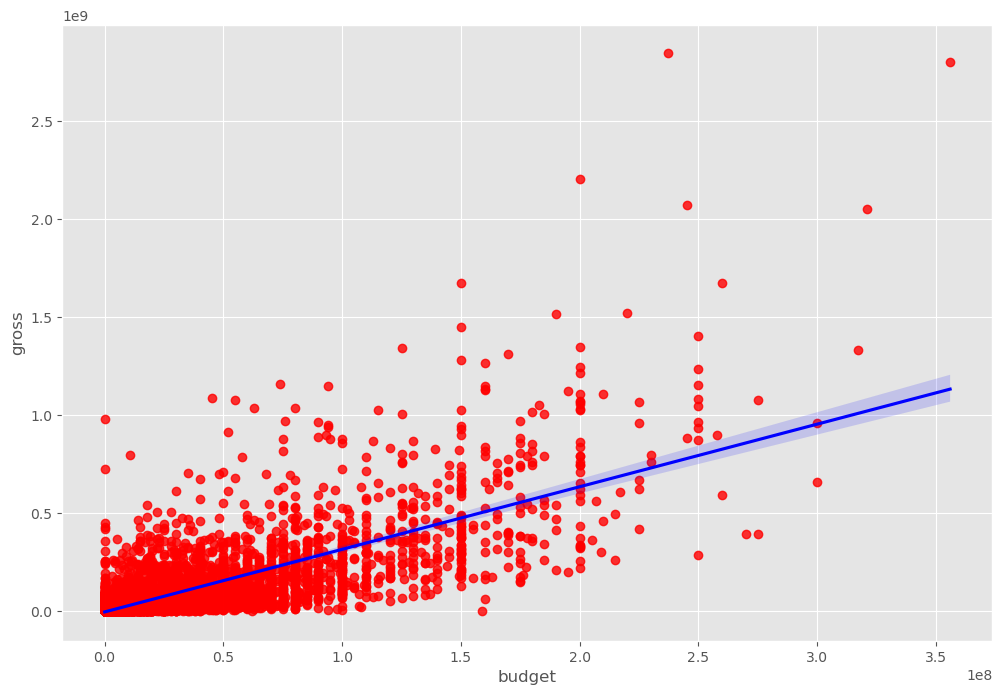

In [39]:
# plot gross vs budget using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws = {'color':'red'},line_kws={'color':'blue'})
plt.show()

In [41]:
# LET's look at correlation 
df.corr(numeric_only = True) # there are different type of correlation (pearson,kendall,spearman)
# I was right gross and budget have high correlation.

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.630757  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.748719  0.269510
gross    0.257486  0.186258  0.630757  0.748719  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.269510  0.245216  1.000000

In [43]:
df.corr(method='kendall',numeric_only = True)

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.548899  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.536640  0.176016
gross    0.200618  0.086046  0.548899  0.536640  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.176016  0.168933  1.000000

In [45]:
df.corr(method='pearson',numeric_only = True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.630757  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.748719  0.269510
gross    0.257486  0.186258  0.630757  0.748719  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.269510  0.245216  1.000000

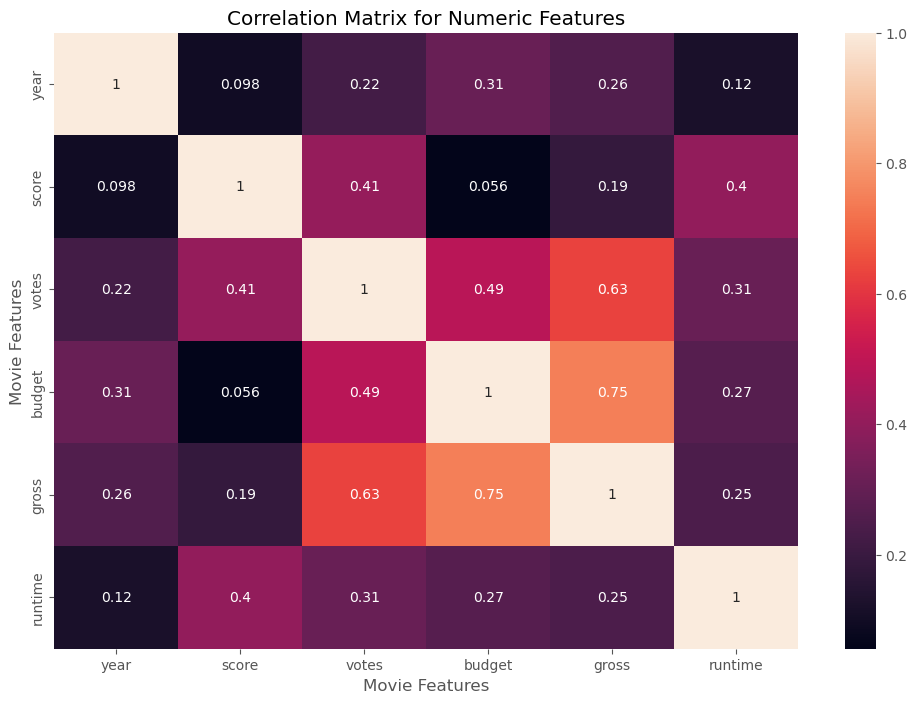

In [47]:
correlation_matrix = df.corr(method='pearson',numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()